
**MIDTERM PROJECT**

---

Nama Anggota:
1.   Firlisa Anggraeni (1301184103)
2.   Putri Nurika Adila (1301184309)

Kelas: IF-42-GAB01

---



**Import Library**

In [ ]:
pip install googletrans==3.1.0a0

     |████████████████████████████████| 55 kB 3.0 MB/s 
     |████████████████████████████████| 1.3 MB 17.7 MB/s 
     |████████████████████████████████| 42 kB 1.7 MB/s 
     |████████████████████████████████| 65 kB 4.3 MB/s 
     |████████████████████████████████| 53 kB 2.7 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=2924bf77887fd8bd7378bbc2ec4c666a0e646043ea97704acaa67270e6e466fe
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import networkx as nx
import os
import re
import tweepy
import warnings
warnings.simplefilter(action='ignore')

from textblob import TextBlob
from googletrans import Translator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Eksplorasi dan Persiapan Data

**Twitter API**

In [ ]:
api_key = "KJVaOzpcdAiDMKGYmiVsgO2YJ"
api_key_secret = "xiBvlwYKb4Y4WVrPetsQ2sr6HPEPQEITeRYUlV5XfhHoLATPly"
access_token = "1447466270329225216-BuYGTPDls6Tqfvag1wacpttZtXqcc7"
access_token_secret = "yrLo13mpY5K1C0WK0NRWt2TWs6lkjpZUfk7UiNnodok15"

auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token,access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AJS/indonesian_vaccination_tweets.csv")

df

,id,date,text,hashtags,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,source,retweets,favorites,is_retweet,reply_to_status
0,1348286903527768065,2021-01-10 15:13:42,#vaksin untuk #indonesia https://t.co/URgujrcKUn,"['vaksin', 'indonesia']",Ns. Bayu Aji Sismanto,"Bekasi, Jawa Barat",#nurseendoscopy #gastroenterology #pulmonology...,2012-04-22 04:00:39,214,627,1771,False,Twitter for Android,0,1,False,NaN
1,1348302168248340481,2021-01-10 16:14:21,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,NaN,DiskominfoKotaBogor,Kota Bogor - Jawa Barat,Akun twitter resmi Dinas Komunikasi dan Inform...,2014-05-06 02:08:47,4617,203,38,False,Twitter for iPhone,0,0,False,NaN
2,1348307055040348160,2021-01-10 16:33:46,Sistem satu data mendukung Vaksinasi di Indone...,"['Vaksin', 'Covid19', 'CoronaVirus', 'Kesehatan']",Indah Nur Hidayah,NaN,NaN,2020-11-25 03:24:19,10,22,38,False,Twitter Web App,0,0,False,NaN
3,1348322660925669377,2021-01-10 17:35:47,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...,"['vaksinhalal', 'vaksinsiap34propinsi', 'vaksi...",lemahku,NaN,"lemahku, dark side, toxic, and anything negati...",2020-11-30 13:07:42,3,158,10,False,Twitter for Android,0,0,False,NaN
4,1348425614584266753,2021-01-11 00:24:53,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,"['Vaksin', 'Perusahaanfarmasi', 'Virus', 'Farm...",BaBe - Baca Berita,Indonesia,Aku resmi BaBe - Aplikasi berita pintar yang m...,2014-01-23 08:06:14,5128,48,95,False,BaBe,0,0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13486,1384533013568974856,2021-04-20 15:42:48,Wah @bank_sinarmas dan @as_sinarmas hebat juga...,['tegal'],Seputar Kota Tegal,"Tegal Timur, Indonesia","Kota Tegal ""New Normal"" senyum cerah terlihat...",2020-02-23 09:15:00,56,474,11,False,Twitter for iPhone,0,0,False,NaN
13487,1384582641664544769,2021-04-20 19:00:00,Kunci Pemulihan Ekonomi adalah Ketersediaan Va...,NaN,Mata Milenial Indonesia,"Jakarta, Indonesia",Megaportal berbasis media online dan tv stream...,2018-09-14 03:57:54,362,19,779,False,TweetDeck,0,2,False,NaN
13488,1384607207564595201,2021-04-20 20:37:37,#bandartogelonline #bocorantogel #angkajitu #p...,"['bandartogelonline', 'bocorantogel', 'angkaji...",Bandar Togel Online | Live casino Online Resmi,NaN,kunjungi web kami https://t.co/uzorzBuGri\n◘Di...,2020-09-25 20:04:29,217,1028,692,False,Twitter Web App,0,1,False,NaN
13489,1384609537689231363,2021-04-20 20:46:53,Kepada seluruh wanita Indonesia \n\nSELAMAT HA...,"['kapoldajatim', 'poldajatim', 'polwanjatim', ...",Polsek Tandes Sby,"Kota Surabaya, Jawa Timur",NaN,2016-09-17 03:59:41,218,32,4,False,Twitter for Android,0,0,False,NaN


In [ ]:
final1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/AJS/Final1.xlsx")
final2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AJS/Final2.csv")

final1

,tweet_id,retweeter_sn,relation,tweet
0,1348452918861517056,KiKi_MB,jabarprovgoid,Sampurasun wargi jabar 🙏\n.\nYuk wargi kita li...
1,1348452918861517056,bondolclekitet,jabarprovgoid,Sampurasun wargi jabar 🙏\n.\nYuk wargi kita li...
2,1348452918861517056,Igo_winata,jabarprovgoid,Sampurasun wargi jabar 🙏\n.\nYuk wargi kita li...
3,1348452918861517056,disperindag_jbr,jabarprovgoid,Sampurasun wargi jabar 🙏\n.\nYuk wargi kita li...
4,1348454103945416960,ahmagun13,Z3ll1xX,Aceh Salah Satu Provinsi Yang Menerapkan Syari...
...,...,...,...,...
2832,1362371290045234944,Sosro63378613,IndonesiaBaikId,Hi sohIB!\nPemerintah menetapkan bahwa vaksina...
2833,1362401489319170048,DewiFor02929507,IndonesiaBaikId,Hi sohIB!\nVaksinasi tahap II tlh dimulai dan ...
2834,1362401489319170048,adjidjawa,IndonesiaBaikId,Hi sohIB!\nVaksinasi tahap II tlh dimulai dan ...
2835,1362567630624869888,arifsetia2013d,JulieAisyah2,#USA #vaksin @PfizerBiontech #COVID19 #WuhanVi...


In [ ]:
final2

,tweet_id,retweeter_sn,relation,tweet
0,1362567630624870400,arifsetia2013d,JulieAisyah2,#USA #vaksin @PfizerBiontech #COVID19 #WuhanVi...
1,1362567630624870400,ArifSetia2013rd,JulieAisyah2,#USA #vaksin @PfizerBiontech #COVID19 #WuhanVi...
2,1362575458156507138,ahmadruslanpkb,DPWPKBJAKARTA,"Legislator PKB Jakarta , Sutikno sampaikan per..."
3,1362575458156507138,JakpusDpc,DPWPKBJAKARTA,"Legislator PKB Jakarta , Sutikno sampaikan per..."
4,1362575458156507138,fpkbdki,DPWPKBJAKARTA,"Legislator PKB Jakarta , Sutikno sampaikan per..."
...,...,...,...,...
1973,1384461846384545798,tulong8807,IndonesiaBaikId,Hi sohIB!\nPenyintas atau survivor Covid-19 bs...
1974,1384461846384545798,percayaNgl,IndonesiaBaikId,Hi sohIB!\nPenyintas atau survivor Covid-19 bs...
1975,1384461846384545798,Na_Aleeya,IndonesiaBaikId,Hi sohIB!\nPenyintas atau survivor Covid-19 bs...
1976,1384496578510036993,PadukaYankMulia,holopiscom,"Vaksinasi Seniman, Mendikbud: Agar Sektor Seni..."


In [ ]:
df = pd.concat([final1, final2])
df

,tweet_id,retweeter_sn,relation,tweet
0,1348452918861517056,KiKi_MB,jabarprovgoid,Sampurasun wargi jabar 🙏\n.\nYuk wargi kita li...
1,1348452918861517056,bondolclekitet,jabarprovgoid,Sampurasun wargi jabar 🙏\n.\nYuk wargi kita li...
2,1348452918861517056,Igo_winata,jabarprovgoid,Sampurasun wargi jabar 🙏\n.\nYuk wargi kita li...
3,1348452918861517056,disperindag_jbr,jabarprovgoid,Sampurasun wargi jabar 🙏\n.\nYuk wargi kita li...
4,1348454103945416960,ahmagun13,Z3ll1xX,Aceh Salah Satu Provinsi Yang Menerapkan Syari...
...,...,...,...,...
1973,1384461846384545798,tulong8807,IndonesiaBaikId,Hi sohIB!\nPenyintas atau survivor Covid-19 bs...
1974,1384461846384545798,percayaNgl,IndonesiaBaikId,Hi sohIB!\nPenyintas atau survivor Covid-19 bs...
1975,1384461846384545798,Na_Aleeya,IndonesiaBaikId,Hi sohIB!\nPenyintas atau survivor Covid-19 bs...
1976,1384496578510036993,PadukaYankMulia,holopiscom,"Vaksinasi Seniman, Mendikbud: Agar Sektor Seni..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4815 entries, 0 to 1977
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tweet_id      4815 non-null   object
 1   retweeter_sn  4815 non-null   object
 2   relation      4815 non-null   object
 3   tweet         4815 non-null   object
dtypes: object(4)
memory usage: 188.1+ KB


In [ ]:
u_name = df["user_name"].unique()
u_name

array(['Ns. Bayu Aji Sismanto', 'DiskominfoKotaBogor',
       'Indah Nur Hidayah', ..., 'HumasPolsekKanigoro',
       'Polsek Tandes Sby', 'iMultimedia™'], dtype=object)

In [ ]:
flwrs = []
flwg = []

for i in range(len(u_name)):
  for j in range(len(df)):
    if str(df["user_name"][j]) == str(u_name[i]):
      flwrs.append(df["user_followers"][j])
      flwg.append(df["user_friends"][j])
      break

In [ ]:
followers = pd.DataFrame()
followers["user_name"] = u_name
followers["followers"] = flwrs

followers.sort_values(by="followers", ascending=False, inplace=True)
followers.head(5)

,user_name,followers
268,detikcom,16582354
803,tvOneNews,9000878
246,Kompas.com,7995738
68,VIVAcoid,4295281
652,Official RCTI,3409676


**Statistik Followers**

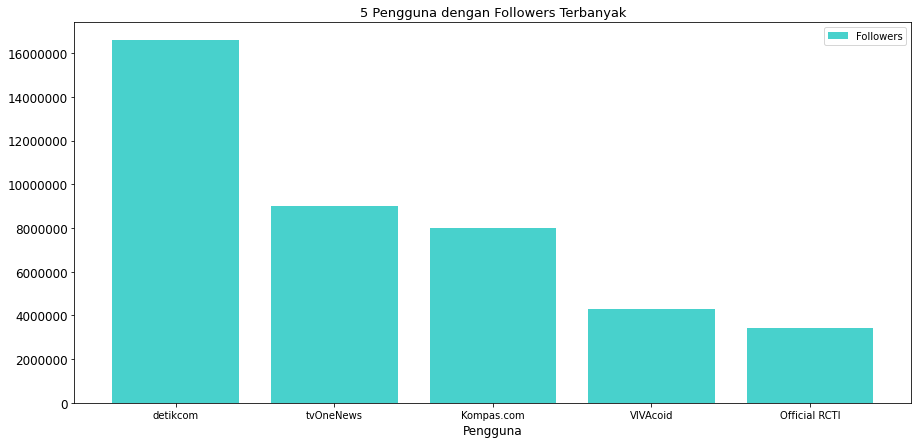

In [ ]:
t5_flwrs = followers.head(5)

fig, ax = plt.subplots(figsize=(15, 7))
plt.ticklabel_format(style = 'plain')

plt.bar(t5_flwrs["user_name"], t5_flwrs["followers"], color='mediumturquoise')

plt.title('5 Pengguna dengan Followers Terbanyak', size=13)
plt.xlabel("Pengguna",size=12)
plt.yticks(size=12)

plt.legend(["Followers"])

plt.show()

Berdasarkan histogram diatas, jumlah followers terbanyak yaitu sebesar 16582354 dengan screen_name detikcom.

**Statistik Following**

In [ ]:
following = pd.DataFrame()
following["user_name"] = u_name
following["following"] = flwg

following.sort_values(by="following", ascending=False, inplace=True)
following.head(5)

,user_name,following
1984,Gojek Indonesia,69197
491,Fahira Idris DPD RI,27924
651,IniGresik,16285
1021,Bakul Ikan,15923
2741,Partha Saderi™,12459


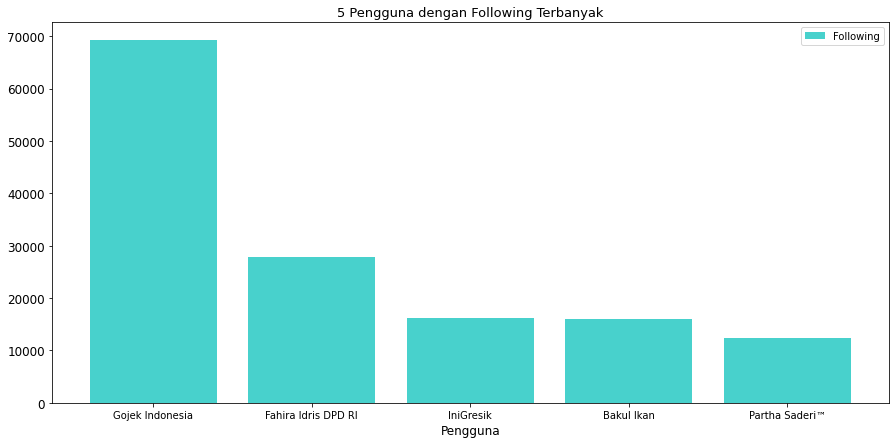

In [ ]:
t5_flwg = following.head(5)

plt.figure(figsize=(15,7))
plt.ticklabel_format(style = 'plain')
plt.bar(t5_flwg["user_name"], t5_flwg["following"], color='mediumturquoise')

plt.title('5 Pengguna dengan Following Terbanyak', size=13)
plt.xlabel("Pengguna",size=12)
plt.yticks(size=12)

plt.legend(["Following"])

plt.show()

Berdasarkan histogram diatas, jumlah following terbanyak yaitu sebesar 69197 dengan screen_name Gojek Indonesia.

**Statistik Tweet**

In [ ]:
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

df1 = df['date'].dt.date.value_counts().sort_index().reset_index()
df1.columns = ['date','count']

In [ ]:
df1

,date,count
0,2021-01-10,4
1,2021-01-11,124
2,2021-01-12,253
3,2021-01-13,728
4,2021-01-14,386
...,...,...
94,2021-04-14,128
95,2021-04-15,66
96,2021-04-18,31
97,2021-04-19,140


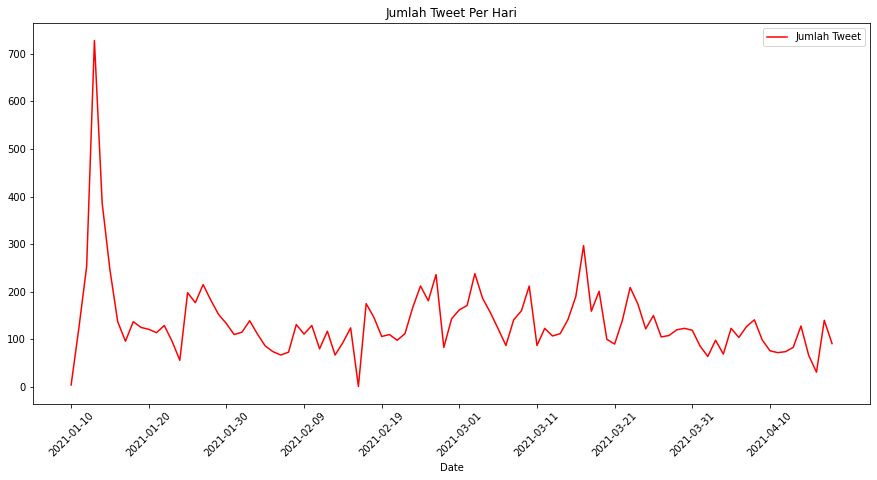

In [ ]:
plt.figure(figsize = (15, 7))
plt.plot(df1['count'], color='red')
plt.xticks(range(0,df1.shape[0],10),df1['date'].loc[::10],rotation=45)
plt.title('Jumlah Tweet Per Hari')
plt.xlabel('Date')

plt.legend(["Jumlah Tweet"])

Berdasarkan grafik diatas, jumlah tweet terbanyak adalah 728 pada tanggal 2021-01-13.

# Preprocessing Data

**Cek missing value**

In [ ]:
df.isnull().sum()

tweet_id        0
retweeter_sn    0
relation        0
tweet           0
dtype: int64

**Replace string kosong (" ") dengan karakter "_"**

In [ ]:
df.columns = [c.replace(' ', '_') for c in df.columns]

In [ ]:
print(df.columns)

Index(['tweet_id', 'retweeter_sn', 'relation', 'tweet'], dtype='object')


**Replace string kosong (" ") dengan NaN**

In [ ]:
df["relation"].replace('', np.nan, inplace=True)
df.dropna(subset=["relation"], inplace=True)

# Network Analysis

In [ ]:
n_anlys = df[["retweeter_sn", "relation"]]
n_anlys.reset_index(inplace=True)
n_anlys.drop(columns="index", inplace=True)

n_anlys

,retweeter_sn,relation
0,KiKi_MB,jabarprovgoid
1,bondolclekitet,jabarprovgoid
2,Igo_winata,jabarprovgoid
3,disperindag_jbr,jabarprovgoid
4,ahmagun13,Z3ll1xX
...,...,...
4810,tulong8807,IndonesiaBaikId
4811,percayaNgl,IndonesiaBaikId
4812,Na_Aleeya,IndonesiaBaikId
4813,PadukaYankMulia,holopiscom


In [ ]:
#membuat graf
gpd = nx.Graph()
for i, elrow in n_anlys.iterrows():
  gpd.add_edge(elrow[0], elrow[1]) #menambahkan data edge

In [ ]:
print(gpd)

Graph with 2669 nodes and 2629 edges


In [ ]:
#menghitung nilai closeness centrality
closCent = nx.closeness_centrality(gpd)
df_closeness = pd.DataFrame.from_dict(closCent, orient='index')
df_closeness.columns = ['Closeness']
df_closeness.sort_values(by=['Closeness'], inplace=True, ascending=False)
df_closeness.head(10)

,Closeness
muhammadiyah,0.196819
viralvideovlogs,0.183338
Puspen_TNI,0.183154
AmstrongBiring,0.180401
PutraWadapi,0.180282
Alva1588,0.178660
Ahmadna08719243,0.174604
IndonesiaBaikId,0.169378
djikp,0.167430
BeKenshin,0.166384


Berdasarkan tabel diatas, pengguna dengan screen name muhammadiyah merupakan pengguna yang paling berpengaruh pada dataset yang digunakan dengan nilai closeness 0,197.

# Result

In [ ]:
vis = n_anlys[n_anlys["relation"].isin(["muhammadiyah"])]
vis

,retweeter_sn,relation
12,Sunarti25231614,muhammadiyah
13,MDMCIndonesia,muhammadiyah
14,AlFatih24678932,muhammadiyah
15,wangchuliching,muhammadiyah
16,Rizal_almaun,muhammadiyah
...,...,...
4710,RizalIsaNst,muhammadiyah
4711,raurusan_id,muhammadiyah
4712,arifnur,muhammadiyah
4713,ismailfahmi,muhammadiyah


In [ ]:
#membuat graf
gpd = nx.Graph()
for i, elrow in vis.iterrows():
  gpd.add_edge(elrow[0], elrow[1]) #menambahkan data edge

In [ ]:
print(gpd)

Graph with 285 nodes and 285 edges


(-1.2046460414193192,
 1.2084837937683528,
 -1.2096443524656286,
 1.2099662054379106)

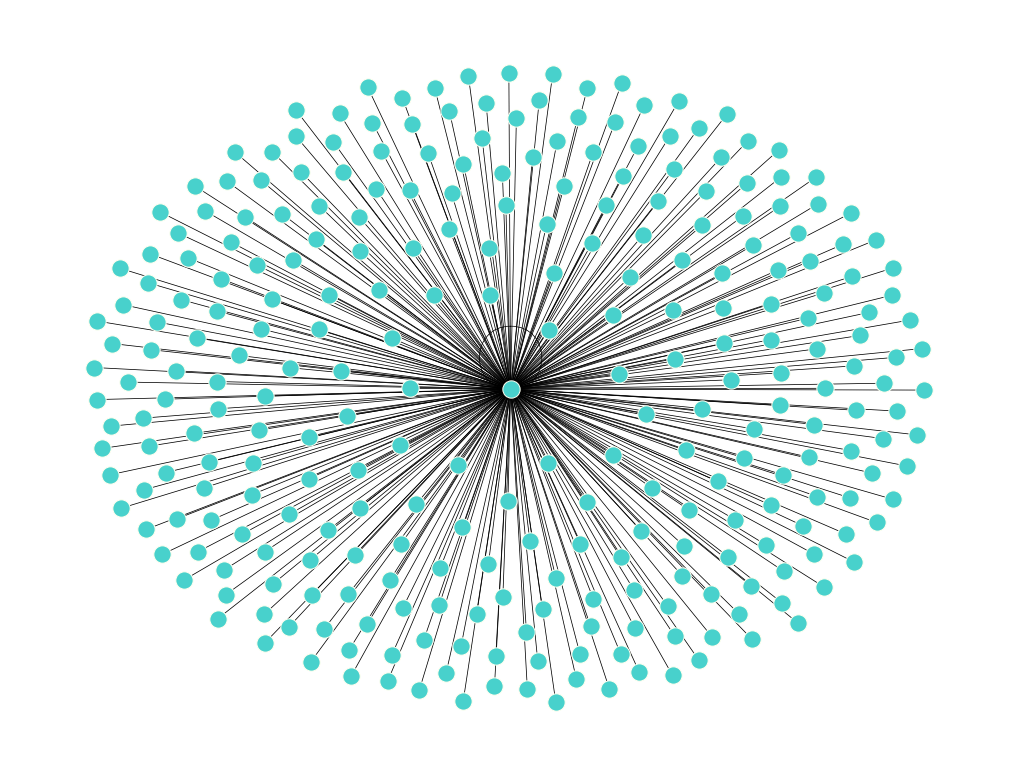

In [ ]:
#visualisasi graf
pos = nx.spring_layout(gpd)
plt.figure(figsize=(18,14))
nx.draw_networkx(gpd, pos=pos, with_labels=False, node_color='mediumturquoise', edgecolors='ivory', width=0.75)
plt.axis('off')

# Critical Analysis

Mengidentifikasi pengguna paling berpengaruh berdasarkan jumlah edge.

In [ ]:
u_rel = n_anlys["relation"].unique()
# u_rel.reset_index(inplace=True)

u_rel

array(['jabarprovgoid', 'Z3ll1xX', 'lppom_mui', 'IndonesiaBaikId',
       'muhammadiyah', 'dw_indonesia', 'EkaHospital', 'TeleskopID',
       'VIVAcoid', 'MUIPusat', 'OfficialiNewsTV', 'getvaccs',
       'madtu_madali', 'Arsikamadja', 'TVMuhammadiyah', 'arisartawan',
       'kabargolkarnews', 'bangsatwika', 'rmolbantencom', 'Acuantodaycom',
       'dealioID', 'JNE_JOG', 'radamuhucom', 'Fraksi_NasDem',
       'PoldaJogja', 'JNE_ID', 'innokribow', 'PCIMjpn', 'KojekRapBetawi',
       'Lintas_MNCTV', 'SutanSee', 'MotorSupreme', 'fixpadang',
       'SaidahJuly', 'kompascom', 'ajaib_investasi', 'lampostco',
       'antaranews', 'detikcom', 'Erviinms', 'detikHealth',
       'profesor_saham', 'insan_bm', 'KapanLagicom', 'porosfm',
       'Upil_Jarann', 'tomikalaza', 'UseeTVcom', 'infocimahico',
       'Triaviandi', 'radar_malang', 'catchmeupid', 'indiekraf',
       'LucuLucuVideo', 'beritarienews', 'fplchampionsid', 'timescoid',
       'serambinews', 'Mancode_ID', 'NinjaHatari__', 'klinikhukum

In [ ]:
sum = []

for i in range(len(u_rel)):
  c = 0
  for j in range(len(n_anlys)):
    if str(n_anlys["relation"][j]) == str(u_rel[i]):
      c+=1
  sum.append(c)

In [ ]:
edge = pd.DataFrame()
edge["screen_name"] = u_rel
edge["edges"] = sum

edge.sort_values(by="edges", ascending=False, inplace=True)

**Menampilkan 5 username dengan jumlah edge terbanyak**

In [ ]:
edge.head(5)

,screen_name,edges
4,muhammadiyah,599
212,Puspen_TNI,287
50,radar_malang,268
3,IndonesiaBaikId,212
38,detikcom,148


**Menampilkan 5 username dengan jumlah edge paling tersedikit**

In [ ]:
edge.tail(5)

,screen_name,edges
319,senku_sensei,1
321,tegal_warta,1
322,KajiBiyanto,1
325,KadrunMenolak,1
222,ptfm_brin,1


Berdasarkan tabel diatas, jumlah edge terbanyak adalah 599 yaitu milik pengguna dengan screen_name muhammadiyah. Maka dari itu, pengguna tersebut merupakan pengguna yang paling berpengaruh sesuai dengan hasil closeness centrality.

# Sentiment Analysis

In [ ]:
#memfilter kolom relation yang screen name nya muhammadiyah
m_influence = df.loc[df['relation'].isin(['muhammadiyah'])]
m_influence.drop(columns=["retweeter_sn"], inplace=True)
m_influence.drop_duplicates(inplace=True)
m_influence

,tweet_id,relation,tweet
12,1348562330389410048,muhammadiyah,Menurut @Abe_Mukti Muhammadiyah sendiri memil...
26,1348562331983245056,muhammadiyah,"Kedua, jika syarat pertama terpenuhi Muhammadi..."
56,1348834406710923008,muhammadiyah,"Berdasarkan pertimbangan kemaslahatan umum, ti..."
276,1349266367648698112,muhammadiyah,Sekarang beberapa rumah sakit Muhammadiyah dan...
354,1349334941763390976,muhammadiyah,Jangan lewatkan Pengajian Umum PP Muhammadiyah...
427,1349590548294713088,muhammadiyah,Edaran PP Muhammadiyah tentang Pembatasan Kegi...
459,1349623535380144128,muhammadiyah,Vaksin merupakan salah satu upaya standar dala...
479,1349657515928154112,muhammadiyah,Di Muhammadiyah sendiri dalam melakukan analis...
550,1349945256351985920,muhammadiyah,Jangan lewatkan Pengajian Umum PP Muhammadiyah...
571,1350028387369120000,muhammadiyah,"Kepada warga Muhammadiyah, mari kita berikhtia..."


In [ ]:
m_influence.reset_index(inplace=True)
m_influence.drop(columns=["index"], inplace=True)

In [ ]:
m_influence

,tweet_id,relation,tweet
0,1348562330389410048,muhammadiyah,Menurut @Abe_Mukti Muhammadiyah sendiri memil...
1,1348562331983245056,muhammadiyah,"Kedua, jika syarat pertama terpenuhi Muhammadi..."
2,1348834406710923008,muhammadiyah,"Berdasarkan pertimbangan kemaslahatan umum, ti..."
3,1349266367648698112,muhammadiyah,Sekarang beberapa rumah sakit Muhammadiyah dan...
4,1349334941763390976,muhammadiyah,Jangan lewatkan Pengajian Umum PP Muhammadiyah...
5,1349590548294713088,muhammadiyah,Edaran PP Muhammadiyah tentang Pembatasan Kegi...
6,1349623535380144128,muhammadiyah,Vaksin merupakan salah satu upaya standar dala...
7,1349657515928154112,muhammadiyah,Di Muhammadiyah sendiri dalam melakukan analis...
8,1349945256351985920,muhammadiyah,Jangan lewatkan Pengajian Umum PP Muhammadiyah...
9,1350028387369120000,muhammadiyah,"Kepada warga Muhammadiyah, mari kita berikhtia..."


In [ ]:
#translate tweet dari bahasa indonesia menjadi bahasa inggris
translator = Translator()
m_influence['english'] = m_influence['tweet'].apply(translator.translate, src='id', dest='en').apply(getattr, args=('text',))
m_influence

,tweet_id,relation,tweet,english
0,1348562330389410048,muhammadiyah,Menurut @Abe_Mukti Muhammadiyah sendiri memil...,According to @Abe_Mukti Muhammadiyah itself ha...
1,1348562331983245056,muhammadiyah,"Kedua, jika syarat pertama terpenuhi Muhammadi...","Second, if the first conditions are met, accor..."
2,1348834406710923008,muhammadiyah,"Berdasarkan pertimbangan kemaslahatan umum, ti...",Based on the consideration of the public benef...
3,1349266367648698112,muhammadiyah,Sekarang beberapa rumah sakit Muhammadiyah dan...,Now several Muhammadiyah and Aisyiyah hospital...
4,1349334941763390976,muhammadiyah,Jangan lewatkan Pengajian Umum PP Muhammadiyah...,Don't miss the PP Muhammadiyah General Recitat...
5,1349590548294713088,muhammadiyah,Edaran PP Muhammadiyah tentang Pembatasan Kegi...,PP Muhammadiyah Circular regarding Restriction...
6,1349623535380144128,muhammadiyah,Vaksin merupakan salah satu upaya standar dala...,Vaccines are one of the standard efforts in ha...
7,1349657515928154112,muhammadiyah,Di Muhammadiyah sendiri dalam melakukan analis...,"At Muhammadiyah itself, the scientific analysi..."
8,1349945256351985920,muhammadiyah,Jangan lewatkan Pengajian Umum PP Muhammadiyah...,Don't miss the PP Muhammadiyah General Study r...
9,1350028387369120000,muhammadiyah,"Kepada warga Muhammadiyah, mari kita berikhtia...","To Muhammadiyah residents, let's make an effor..."


In [ ]:
m_influence.to_excel('ResultEn.xlsx', index=False, header=True)

In [ ]:
text = []
sen_pol = []

for i in range(len(m_influence)): 
  #menghapus beberapa karakter pada tweet menjadi string kosong " "
  clean_txt = " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", str(m_influence["english"][i])).split()) 
  text.append(clean_txt)
  print(clean_txt)
  analysis = TextBlob(clean_txt) #klasifikasi tweet menjadi sentimen positif atau negatif
  sen_pol.append(analysis.sentiment.polarity) #menyimpan nilai polaritas sentimen
  print(analysis.sentiment.polarity)

According to Mukti Muhammadiyah itself has three attitudes regarding the government s vaccination program First Muhammad
0.25
Second if the first conditions are met according to him Muhammadiyah will support the vaccination to run as well as
0.125
Based on the consideration of the public benefit the level of the main emergency dignity dlaruri and for the sake of saving the
0.08333333333333333
Now several Muhammadiyah and Aisyiyah hospitals have facilities to become international vaccine centers K
0.0
Don t miss the PP Muhammadiyah General Recitation regarding the Covid 19 Vaccine Tarjih and Health Perspectives
0.05000000000000002
PP Muhammadiyah Circular regarding Restrictions on Organizational Activities During PPKM and Vaccine Guidance
0.0
Vaccines are one of the standard efforts in handling outbreaks Regarding vaccines Muhammadiyah makes efforts to
0.0
At Muhammadiyah itself the scientific analysis of the vaccine was carried out in stages over 2 days
0.0
Don t miss the PP Muhammadiy

In [ ]:
#membuat dafatrame baru
df_an = pd.DataFrame()
df_an["id"] = m_influence["tweet_id"]
df_an["username"] = m_influence["relation"]
df_an["tweet"] = m_influence["tweet"]
df_an["english"] = m_influence["english"]
df_an["sentiment_polarity"] = sen_pol

In [ ]:
df_an

,id,username,tweet,english,sentiment_polarity
0,1348562330389410048,muhammadiyah,Menurut @Abe_Mukti Muhammadiyah sendiri memil...,According to @Abe_Mukti Muhammadiyah itself ha...,0.250000
1,1348562331983245056,muhammadiyah,"Kedua, jika syarat pertama terpenuhi Muhammadi...","Second, if the first conditions are met, accor...",0.125000
2,1348834406710923008,muhammadiyah,"Berdasarkan pertimbangan kemaslahatan umum, ti...",Based on the consideration of the public benef...,0.083333
3,1349266367648698112,muhammadiyah,Sekarang beberapa rumah sakit Muhammadiyah dan...,Now several Muhammadiyah and Aisyiyah hospital...,0.000000
4,1349334941763390976,muhammadiyah,Jangan lewatkan Pengajian Umum PP Muhammadiyah...,Don't miss the PP Muhammadiyah General Recitat...,0.050000
5,1349590548294713088,muhammadiyah,Edaran PP Muhammadiyah tentang Pembatasan Kegi...,PP Muhammadiyah Circular regarding Restriction...,0.000000
6,1349623535380144128,muhammadiyah,Vaksin merupakan salah satu upaya standar dala...,Vaccines are one of the standard efforts in ha...,0.000000
7,1349657515928154112,muhammadiyah,Di Muhammadiyah sendiri dalam melakukan analis...,"At Muhammadiyah itself, the scientific analysi...",0.000000
8,1349945256351985920,muhammadiyah,Jangan lewatkan Pengajian Umum PP Muhammadiyah...,Don't miss the PP Muhammadiyah General Study r...,0.050000
9,1350028387369120000,muhammadiyah,"Kepada warga Muhammadiyah, mari kita berikhtia...","To Muhammadiyah residents, let's make an effor...",0.000000


In [ ]:
df_an.to_excel('ResultSen.xlsx', index=False, header=True)

In [ ]:
pos = 0
neg = 0
#menghitung jumlah nilai sentimen positif dan negatif
for i in range(len(df_an)):
  if df_an["sentiment_polarity"][i] > 0:
    pos +=1
  elif df_an["sentiment_polarity"][i] <0:
    neg +=1

In [ ]:
print(pos, neg)

20 4


**Hasil Sentimen Positif**

In [ ]:
#menampilkan polaritas sentimen 5 tertinggi
df_an.sort_values(by=['sentiment_polarity'], inplace=True, ascending=False)

df_an.head(5)

,id,username,tweet,english,sentiment_polarity
13,1350325661542526976,muhammadiyah,"Mewakili Pemuda Muhammadiyah DKI Jakarta, Dwi ...",Representing the Muhammadiyah Youth of DKI Jak...,0.600000
33,1369588023923417090,muhammadiyah,Emang Vaksin Aman?\nhttps://t.co/FyzWB2hSYD\n#...,Are Vaccines Safe?\nhttps://t.co/FyzWB2hSYD\n#...,0.500000
19,1353972189645712896,muhammadiyah,Harusnya yang divaksin bisa mencapai 80 % warg...,The vaccinated people should be able to reach ...,0.500000
22,1368909368780075012,muhammadiyah,"Tanpa adanya vaksin, Covid-19 bukanlah virus m...","Without a vaccine, Covid-19 is not an easy vir...",0.433333
15,1350340884684960000,muhammadiyah,Vaksinasi dan menjaga protokol kesehatan adala...,Vaccinations and maintaining health protocols ...,0.433333


**Hasil Sentimen Negatif**

In [ ]:
#menampilkan polaritas sentimen 5 terendah
df_an.sort_values(by=['sentiment_polarity'], inplace=True, ascending=True)

df_an.head(5)

,id,username,tweet,english,sentiment_polarity
41,1380375043620839425,muhammadiyah,Dalam program vaksinasi nasional sebelum muncu...,In the national vaccination program prior to t...,-0.250000
23,1369098587309707266,muhammadiyah,Penggunaan vaksin bukan hal baru. Bagaimana se...,The use of vaccines is not new. How is the his...,-0.068182
29,1369256429639536644,muhammadiyah,Vaksinasi ini salah satu investasi kesehatan j...,Vaccination is one of the long-term health inv...,-0.050000
35,1373206015991115789,muhammadiyah,Prinsip kami sepanjang MUI dan Badan Pengawas ...,Our principle as long as the MUI and the Food ...,-0.050000
3,1349266367648698112,muhammadiyah,Sekarang beberapa rumah sakit Muhammadiyah dan...,Now several Muhammadiyah and Aisyiyah hospital...,0.000000
